# PCA


In [148]:

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib as mpt
import plotly as plt
from plotly.subplots import make_subplots


from sklearn.preprocessing import PowerTransformer, StandardScaler, OrdinalEncoder, FunctionTransformer, LabelEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import KNNImputer, IterativeImputer, SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

In [70]:
df = pd.read_csv("../wine_data2.csv")

In [71]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [73]:
df.nunique()

type                      2
fixed acidity           106
volatile acidity        187
citric acid              89
residual sugar          316
chlorides               214
free sulfur dioxide     135
total sulfur dioxide    276
density                 998
pH                      108
sulphates               111
alcohol                 111
quality                   7
dtype: int64

In [74]:
df.duplicated().sum()
df = df.drop_duplicates()

In [75]:
df.shape

(5329, 13)

In [76]:
# print(df.info())
# print(df.describe())
df.shape
df["quality"].count()

5329

In [77]:
df.head(2)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.994,3.3,0.49,9.5,6


In [78]:

print(df.columns.to_list(), end=" ")

['type', 'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality'] 

<Axes: xlabel='alcohol', ylabel='residual sugar'>

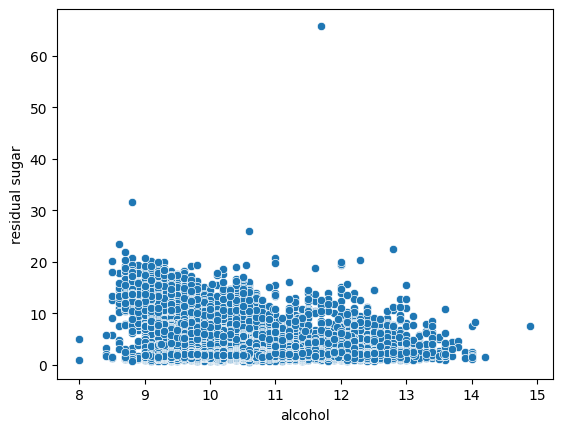

In [79]:
sns.scatterplot(x = df["alcohol"], y = df["residual sugar"])

<Axes: ylabel='alcohol'>

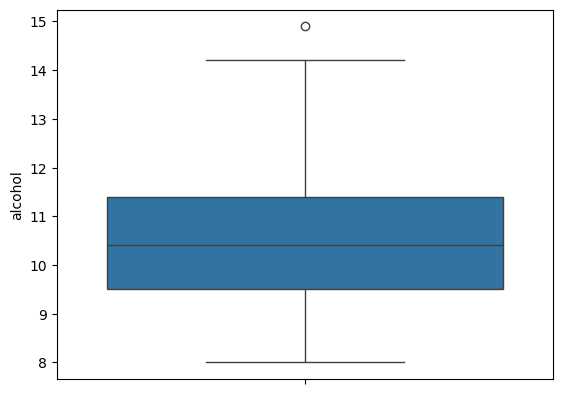

In [80]:
sns.boxplot(df['alcohol'])

1 outlier in alcohol

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2800\2035690723.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.alcohol)


<Axes: xlabel='alcohol', ylabel='Density'>

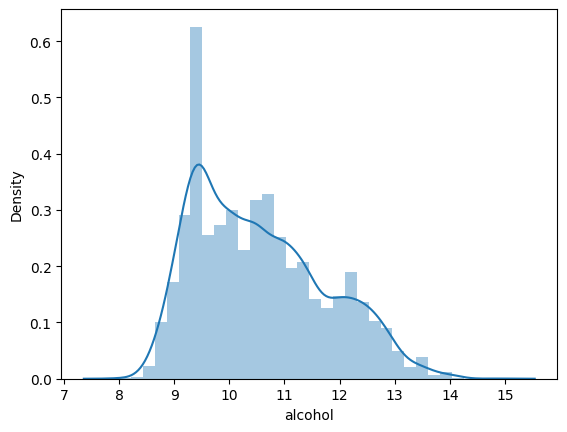

In [81]:
sns.distplot(df.alcohol)

In [82]:
df['type'] = df["type"].map({"red":0, "white":1})

In [83]:
df.type.value_counts()

type
1    3970
0    1359
Name: count, dtype: int64

In [84]:
print(df.shape)
df.columns

(5329, 13)


Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

In [85]:
X = df.drop(columns=["type"])
Y = df["type"]

In [86]:
le = LabelEncoder()
Y = le.fit_transform(Y)

In [87]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2, random_state=42)

In [88]:
Xtrain.shape, Xtest.shape
Ytest.shape, Ytrain.shape


((1066,), (4263,))

In [89]:
# Xtest.info
Xtest.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [90]:
X.values

array([[ 7.   ,  0.27 ,  0.36 , ...,  0.45 ,  8.8  ,  6.   ],
       [ 6.3  ,  0.3  ,  0.34 , ...,  0.49 ,  9.5  ,  6.   ],
       [ 8.1  ,  0.28 ,  0.4  , ...,  0.44 , 10.1  ,  6.   ],
       ...,
       [ 5.9  ,  0.55 ,  0.1  , ...,    nan, 11.2  ,  6.   ],
       [ 5.9  ,  0.645,  0.12 , ...,  0.71 , 10.2  ,  5.   ],
       [ 6.   ,  0.31 ,  0.47 , ...,  0.66 , 11.   ,  6.   ]])

In [116]:
def outlier_capper_function(X):
    X = np.asarray(X)
    X_copy = X.copy()
    rows, cols = X_copy.shape
    for i in range(cols):
        col_data = X_copy[:, i]
        col_data[col_data > 3] = 3
        col_data[col_data < -3] = -3
        X_copy[:, i] = col_data
        
    return X_copy

In [117]:
capper_funct = FunctionTransformer(outlier_capper_function)

In [118]:
num_cols = X.columns.to_list()
num_cols = num_cols[0:11]
cat_cols = X.columns.to_list()[11]
cat_cols

'quality'

In [119]:
num_pipe = Pipeline(steps=[("imputer", KNNImputer(n_neighbors=10, weights="distance")),
                           ("transformation", PowerTransformer(method="yeo-johnson", standardize=True)),
                           ("outlier_capping", capper_funct), 
                           ("scaling", StandardScaler(with_mean=True, with_std=True))])

In [127]:
cat_pipe = Pipeline(steps=[("imputer", SimpleImputer(strategy="most_frequent") ),
                           ("encoding", OrdinalEncoder(categories=[[3,4,5,6,7,8,9]], handle_unknown="use_encoded_value",
                                                        unknown_value=-1),
                            )])

In [128]:
trf = ColumnTransformer([("nums", num_pipe, num_cols),
                         ("cats", cat_pipe, [cat_cols])], remainder="passthrough")

In [150]:
pipe = Pipeline(steps=[("preprocessing", trf), ("pca", PCA(n_components=0.90, svd_solver="full")), ("model", LogisticRegression(max_iter=1000))])

In [151]:
pipe.fit(Xtrain, Ytrain)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocessing', ...), ('pca', ...), ...]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('nums', ...), ('cats', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'passthrough'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different tr

In [152]:
pred = pipe.predict(Xtest)

In [153]:
accuracy_score(Ytest, pred)

0.9896810506566605

In [154]:
np.mean(cross_val_score(pipe, X, Y, cv= 10))

0.9900538165300681

In [155]:
train_score = pipe.score(Xtrain, Ytrain)
test_score = pipe.score(Xtest, Ytest)
print(train_score)
print(test_score)

0.9913206661975135
0.9896810506566605


In [149]:
print(confusion_matrix(y_true=Ytest, y_pred=pred))

[[274   8]
 [  3 781]]
